In [59]:
#Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

#from matplotlib import style
#style.use('ggplot')

#load data from the sklearn datasets
iris = load_iris()
iris.keys()

#Dataframe
iris_df = pd.DataFrame(iris.data,columns= iris.feature_names)
iris_df['target'] = iris.target
iris_df['class'] = iris_df['target'].replace({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})

#Loading the data and target
X = iris_df.drop(['target','class'],axis = 1).values
y = iris_df.target.values

#Figure
#plt.figure(figsize=(10,10))
#plt.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],iris.data[:,3])
#sns.set(style='ticks')
#sns.pairplot(iris_df.loc[:,:'target'],hue='target')

#normalising features
scale = StandardScaler()
X = scale.fit_transform(X)

#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Model selection
models = [DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42),
DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42),
RandomForestClassifier(n_estimators=100,random_state=42),
SVC(kernel='linear',random_state=42),
SVC(kernel='poly',random_state=42),
KNeighborsClassifier(n_neighbors=5)]

for model in models:

    model.fit(X_train,y_train)

    #Model prediction
    prediction = model.predict(X_test)

    #Model Accuracy
    Accuracy = (sum(prediction == y_test)/len(prediction))*100
    print(f'Accuracy of the model is:',Accuracy)


Accuracy of the model is: 96.66666666666667
Accuracy of the model is: 96.66666666666667
Accuracy of the model is: 100.0
Accuracy of the model is: 96.66666666666667
Accuracy of the model is: 96.66666666666667
Accuracy of the model is: 100.0


[Text(133.92000000000002, 181.2, 'X[2] <= -0.743\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 0.564\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]')]

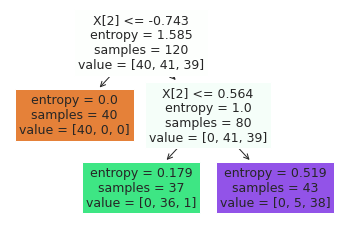

In [79]:
#Decision Tree plot with entropy criterion
tree.plot_tree(models[0],filled=True)


[Text(133.92000000000002, 181.2, 'X[2] <= -0.743\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 0.564\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]

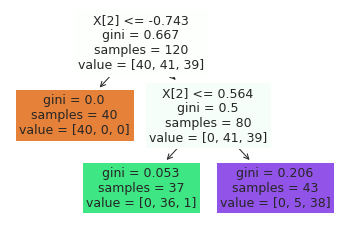

In [78]:
#Decision Tree plot with gini criterion
tree.plot_tree(models[1],filled=True)

In [82]:
#Zoo dataset
#Import libraries
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import tree

#Dataframe
df = pd.read_csv('zoo.data.csv')
df.columns = ['animal name','hair','features','egg','milk','airborne','aquatic','predator','toothead','backbone','breathes','venomous','fins','legs','tail','domestic','cat size','type']

#features and labels
X = df.drop(['animal name','type'],axis = 1).values
y = df['type'].values

#normalising features


#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#scale = StandardScaler()
#X_train= scale.fit_transform(X_train)
#X_test = scale.fit(X_test)


#Model selection
modelss = [DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42),
DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42),
RandomForestClassifier(n_estimators=100,random_state=42),
SVC(kernel='linear',random_state=42),
SVC(kernel='poly',random_state=42),
KNeighborsClassifier(n_neighbors=5)]

for model in modelss:
    model.fit(X_train,y_train)

    #Model prediction
    prediction = model.predict(X_test)

    #Model Accuracy
    Accuracy = (sum(prediction == y_test)/len(prediction))*100
    print(f'Accuracy of  the model is:',Accuracy)


Accuracy of the model is: 90.0
Accuracy of the model is: 95.0
Accuracy of the model is: 100.0
Accuracy of the model is: 95.0
Accuracy of the model is: 70.0
Accuracy of the model is: 65.0


[Text(434.0, 498.3, 'X[3] <= 0.204\nentropy = 2.425\nsamples = 80\nvalue = [31, 16, 4, 12, 4, 7, 6]'),
 Text(372.0, 407.70000000000005, 'X[1] <= 0.75\nentropy = 2.387\nsamples = 49\nvalue = [0, 16, 4, 12, 4, 7, 6]'),
 Text(310.0, 317.1, 'X[8] <= -0.833\nentropy = 2.19\nsamples = 33\nvalue = [0, 0, 4, 12, 4, 7, 6]'),
 Text(186.0, 226.5, 'X[4] <= 0.609\nentropy = 0.996\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 7, 6]'),
 Text(124.0, 135.89999999999998, 'X[6] <= -0.101\nentropy = 0.811\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 2, 6]'),
 Text(62.0, 45.299999999999955, 'entropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 2, 1]'),
 Text(186.0, 45.299999999999955, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 5]'),
 Text(248.0, 135.89999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0]'),
 Text(434.0, 226.5, 'X[11] <= 0.879\nentropy = 1.371\nsamples = 20\nvalue = [0, 0, 4, 12, 4, 0, 0]'),
 Text(372.0, 135.89999999999998, 'X[12] <= -0.409\nentropy = 1.0\nsamples = 8\nva

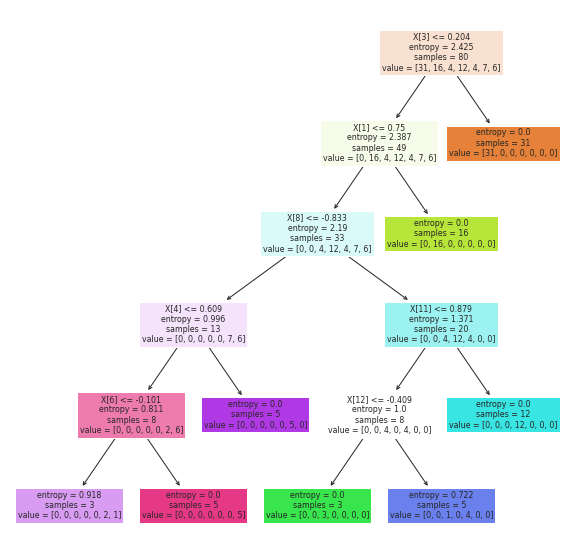

In [77]:
#Decision Tree plot with entropy criterion
plt.figure(figsize=(10,10))
tree.plot_tree(modelss[0],filled=True)

[Text(434.0, 498.3, 'X[3] <= 0.204\ngini = 0.769\nsamples = 80\nvalue = [31, 16, 4, 12, 4, 7, 6]'),
 Text(372.0, 407.70000000000005, 'X[1] <= 0.75\ngini = 0.785\nsamples = 49\nvalue = [0, 16, 4, 12, 4, 7, 6]'),
 Text(310.0, 317.1, 'X[11] <= 0.879\ngini = 0.76\nsamples = 33\nvalue = [0, 0, 4, 12, 4, 7, 6]'),
 Text(248.0, 226.5, 'X[8] <= -0.833\ngini = 0.735\nsamples = 21\nvalue = [0, 0, 4, 0, 4, 7, 6]'),
 Text(124.0, 135.89999999999998, 'X[4] <= 0.609\ngini = 0.497\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 7, 6]'),
 Text(62.0, 45.299999999999955, 'gini = 0.375\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 2, 6]'),
 Text(186.0, 45.299999999999955, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0]'),
 Text(372.0, 135.89999999999998, 'X[12] <= -0.409\ngini = 0.5\nsamples = 8\nvalue = [0, 0, 4, 0, 4, 0, 0]'),
 Text(310.0, 45.299999999999955, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0]'),
 Text(434.0, 45.299999999999955, 'gini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 0, 4, 0, 0]'),
 Tex

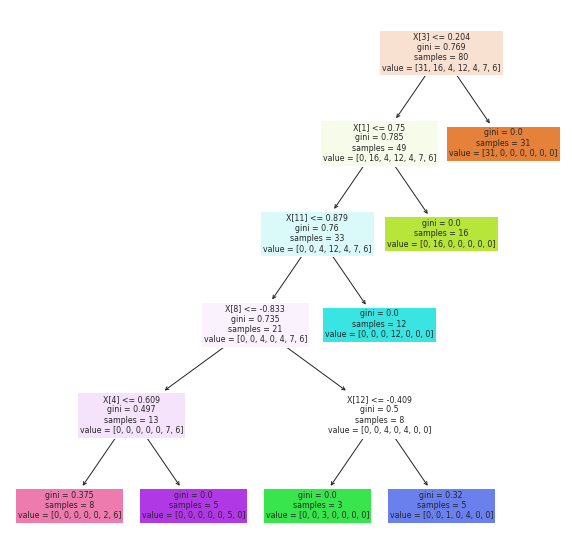

In [76]:
#Decision Tree plot with gini criterion
plt.figure(figsize=(10,10))
tree.plot_tree(modelss[1],filled=True)

[Text(223.20000000000002, 190.26, 'X[3] <= 0.196\nentropy = 2.425\nsamples = 80\nvalue = [31, 16, 4, 12, 4, 7, 6]'),
 Text(167.4, 135.9, 'X[1] <= 0.033\nentropy = 2.387\nsamples = 49\nvalue = [0, 16, 4, 12, 4, 7, 6]'),
 Text(111.60000000000001, 81.53999999999999, 'X[8] <= 0.414\nentropy = 2.19\nsamples = 33\nvalue = [0, 0, 4, 12, 4, 7, 6]'),
 Text(55.800000000000004, 27.180000000000007, 'entropy = 0.996\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 7, 6]'),
 Text(167.4, 27.180000000000007, 'entropy = 1.371\nsamples = 20\nvalue = [0, 0, 4, 12, 4, 0, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0, 0, 0]'),
 Text(279.0, 135.9, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0, 0, 0, 0, 0]')]

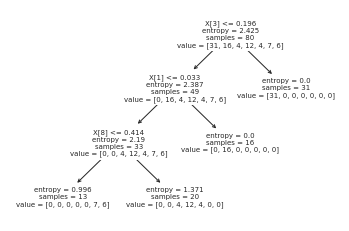

In [75]:
#using Support Vector Classifier (SVC)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import tree
import graphviz

#Dataframe
df = pd.read_csv('zoo.data.csv')
df.columns = ['animal name','hair','features','egg','milk','airborne','aquatic','predator','toothead','backbone','breathes','venomous','fins','legs','tail','domestic','cat size','type']

#features and labels
X = df.drop(['animal name','type'],axis = 1).values
y = df['type'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42,splitter='random')
#model = SVC(kernel='poly')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
Accuracy = (sum(prediction == y_test)/len(prediction))*100
Accuracy
tree.plot_tree(model)


In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
iris = load_iris()
iris.keys()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
Accuracy = (sum(prediction == y_test)/len(prediction))*100
Accuracy
#tree.plot_tree(model)

100.0

In [5]:
#Zoo dataset
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

df = pd.read_csv('zoo.data.csv')
df.columns = ['animal name','hair','features','egg','milk','airborne','aquatic','predator','toothead','backbone','breathes','venomous','fins','legs','tail','domestic','cat size','type']

X = df.drop(['animal name','type'],axis = 1).values
y = df['type'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42,splitter='random')
#model = RandomForestClassifier(n_estimators=10,random_state=42)
#knn
#linear regression
model = SVC(kernel = 'linear',random_state=42)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
# Accuracy = (sum(prediction == y_test)/len(prediction))*100
# Accuracy
model.score(X_test,y_test)

0.95

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('car.data.csv')
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class']
df1 = pd.get_dummies(df)
df1


#X = df1.drop(df.loc[:, :'class_acc']).values
#y = df1['class'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 42)
#model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, random_state= 0,splitter='random')
#model.fit(X_train,y_train)




KeyError: 'class_acc'